<a href="https://colab.research.google.com/github/MinhDucBee1209/Bai-Tap-AI/blob/main/W6_control_motor(temperature)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Control motor according to the temperature

In [12]:
pip install scikit-fuzzy 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


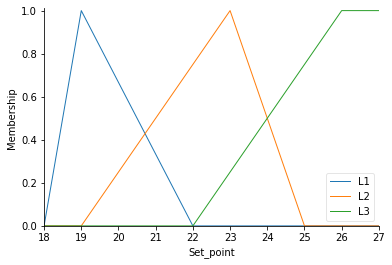

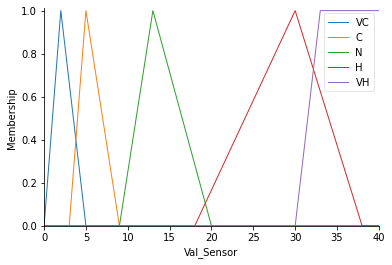

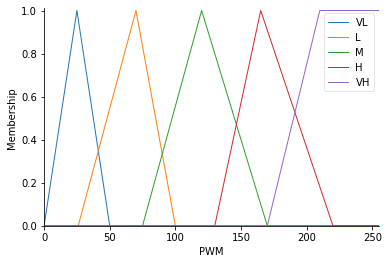

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Set_point = ctrl.Antecedent(np.arange(18, 28, 1), 'Set_point')
Val_Sensor = ctrl.Antecedent(np.arange(0, 40.1, 0.1), 'Val_Sensor')

PWM = ctrl.Consequent(np.arange(0, 256, 1), 'PWM')
# Hz = ctrl.Consequent(np.arange(0, 60, 0.5), 'Hz')

Set_point['L1'] = fuzz.trimf(Set_point.universe, [18, 19, 22])
Set_point['L2'] = fuzz.trimf(Set_point.universe, [19, 23, 25])
Set_point['L3'] = fuzz.trapmf(Set_point.universe, [22,26, 27, 27])

Val_Sensor['VC'] = fuzz.trimf(Val_Sensor.universe, [0, 2, 5])
Val_Sensor['C'] = fuzz.trimf(Val_Sensor.universe, [3, 5, 9])
Val_Sensor['N'] = fuzz.trimf(Val_Sensor.universe, [9, 13, 20])
Val_Sensor['H'] = fuzz.trimf(Val_Sensor.universe, [18, 30, 38])
Val_Sensor['VH'] = fuzz.trapmf(Val_Sensor.universe, [30, 33, 50, 50])


PWM['VL'] = fuzz.trimf(PWM.universe, [0, 25, 50])
PWM['L']  = fuzz.trimf(PWM.universe, [26, 70, 100])
PWM['M']  = fuzz.trimf(PWM.universe, [75, 120, 170])
PWM['H']  = fuzz.trimf(PWM.universe, [130, 165, 220])
PWM['VH'] = fuzz.trapmf(PWM.universe, [170, 210, 260, 260])

Set_point.view()
Val_Sensor.view()
PWM.view()






152.71638167553118


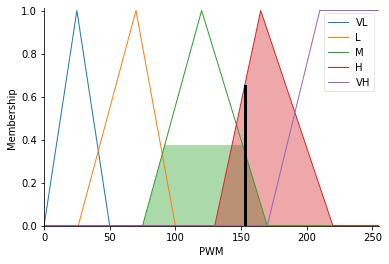

In [14]:
#setpoint/val VC    C   N   H   VH
#   L1        VL    L   M   H   VH
#   L2        VL    L   M   H   VH
#   L3        VL    L   L   M   H

#Tao luat
rule1 = ctrl.Rule(Set_point['L1'] & Val_Sensor['VC'], PWM['VL'])
rule2 = ctrl.Rule(Set_point['L2'] & Val_Sensor['VC'], PWM['VL'])
rule3 = ctrl.Rule(Set_point['L3'] & Val_Sensor['VC'], PWM['VL'])

rule4 = ctrl.Rule(Set_point['L1'] & Val_Sensor['C'], PWM['L'])
rule5 = ctrl.Rule(Set_point['L2'] & Val_Sensor['C'], PWM['L'])
rule6 = ctrl.Rule(Set_point['L3'] & Val_Sensor['C'], PWM['L'])

rule7 = ctrl.Rule(Set_point['L1'] & Val_Sensor['N'], PWM['M'])
rule8 = ctrl.Rule(Set_point['L2'] & Val_Sensor['N'], PWM['M'])
rule9 = ctrl.Rule(Set_point['L3'] & Val_Sensor['N'], PWM['L'])

rule10 = ctrl.Rule(Set_point['L1'] & Val_Sensor['H'], PWM['H'])
rule11 = ctrl.Rule(Set_point['L2'] & Val_Sensor['H'], PWM['H'])
rule12 = ctrl.Rule(Set_point['L3'] & Val_Sensor['H'], PWM['M'])

rule13 = ctrl.Rule(Set_point['L1'] & Val_Sensor['VH'], PWM['VH'])
rule14 = ctrl.Rule(Set_point['L2'] & Val_Sensor['VH'], PWM['VH'])
rule15 = ctrl.Rule(Set_point['L3'] & Val_Sensor['VH'], PWM['H'])

PWMing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
PWMing = ctrl.ControlSystemSimulation(PWMing_ctrl)
PWMing.input['Set_point'] = 27
PWMing.input['Val_Sensor'] = 35
PWMing.compute()
print(PWMing.output['PWM'])

PWM.view(sim = PWMing)